In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,0.0,3.4399999999999999,0.44000000000000039,4.387545011044053
0,0.040404,0.134949,0.888485,2.679650
1,0.080808,0.829899,1.336970,2.968490
2,0.121212,1.524848,1.785455,3.254065
3,0.161616,2.219798,2.233939,3.536375
4,0.202020,2.914747,2.682424,3.815420


In [3]:
M=len(df)
M

99

In [4]:
x1 = df.values[:, 0] # get input values from first column
x2 = df.values[:, 1]
x3 = df.values[:, 2]
y = df.values[:, 3] # get output values from third column for "Y" output
m = len(y) # Number of training examples

print('x1 = ', x1[: 5]) 
print('x2 = ', x2[: 5]) 
print('x3 = ', x3[: 5]) 
print('Y = ', y[: 5]) 
print('m = ', m)

x1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
x2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
x3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
Y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


# Problem 1 (25 points)

Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

1. Report the linear model you found for each explanatory variable.
2. Plot the final regression model and loss over the iteration per each explanatory variable.
3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
4. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.

# **For x1**

Text(0.5, 1.0, 'Scatter plot of explanatory varibale x1')

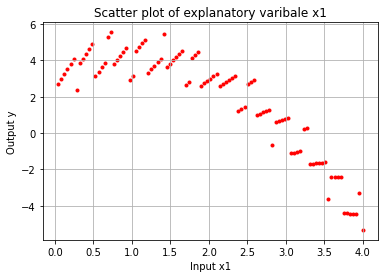

In [5]:
plt.scatter(x1, y, color='red', marker='.')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Input x1')
plt.ylabel('Output y')
plt.title('Scatter plot of explanatory varibale x1')

In [6]:
#Lets create a matrix with single column of ones
x1_0 = np.ones((m, 1))
x1_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
x1_1 = x1.reshape(m, 1)
x1_1[:10]

array([[0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636],
       [0.4040404 ]])

In [8]:
x1 = np.hstack((x1_0, x1_1))
x1[:5]

array([[1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616],
       [1.        , 0.2020202 ]])

In [9]:
theta_x1 = np.zeros(2)
theta_x1

array([0., 0.])

In [10]:
def compute_cost(x, y, theta):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [11]:
# compute the cost for theta values
cost_x1 = compute_cost(x1, y, theta_x1)
print('Cost for given values of theta_0 and theta_1 =', cost_x1)

Cost for given values of theta_0 and theta_1 = 5.483015861682611


In [12]:
def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta)
    return theta, cost_history

In [13]:
theta_x1 = [0., 0.]
iterations_x1 = 100;
alpha_x1 = 0.01;

In [14]:
theta_x1, cost_history_x1 = gradient_descent(x1, y, theta_x1, alpha_x1, iterations_x1)
print('Final value of theta =', theta_x1)
print('cost_history =', cost_history_x1)

Final value of theta = [ 1.23265422 -0.21345481]
cost_history = [5.4416155  5.40304386 5.36697031 5.33310389 5.30118858 5.27099905
 5.24233703 5.215028   5.18891841 5.16387309 5.13977307 5.11651366
 5.09400269 5.07215902 5.05091124 5.03019648 5.00995936 4.99015115
 4.97072892 4.95165485 4.93289566 4.914422   4.89620803 4.87823096
 4.86047072 4.84290961 4.825532   4.80832414 4.79127387 4.77437046
 4.75760444 4.74096743 4.72445204 4.70805171 4.69176067 4.67557376
 4.65948645 4.6434947  4.62759491 4.6117839  4.59605883 4.58041716
 4.56485664 4.54937524 4.53397114 4.51864272 4.50338852 4.4882072
 4.47309758 4.45805857 4.44308917 4.4281885  4.41335573 4.39859009
 4.38389089 4.36925749 4.35468928 4.34018571 4.32574625 4.31137041
 4.29705773 4.28280776 4.2686201  4.25449434 4.24043011 4.22642704
 4.21248478 4.19860299 4.18478134 4.17101951 4.1573172  4.1436741
 4.13008992 4.11656437 4.10309715 4.08968801 4.07633665 4.06304282
 4.04980625 4.03662666 4.02350381 4.01043743 3.99742728 3.9844731
 

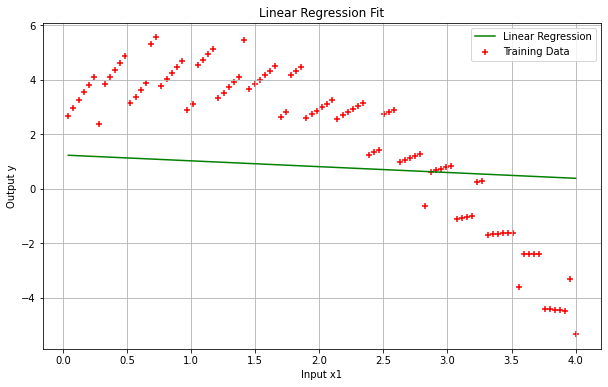

In [15]:
plt.scatter(x1[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x1[:,1], x1.dot(theta_x1), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input x1')
plt.ylabel('Output y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Convergence of gradient descent of x1')

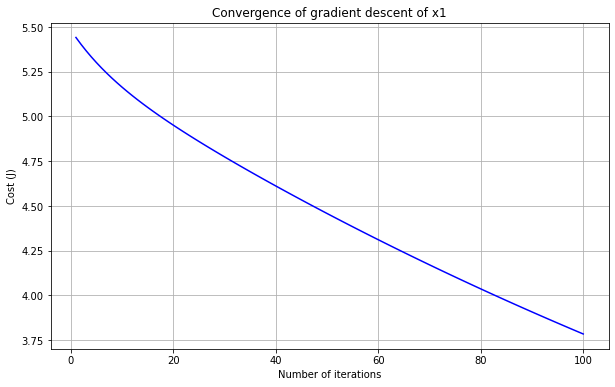

In [16]:
plt.plot(range(1, iterations_x1 + 1), cost_history_x1, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent of x1')

# **For x2**

Text(0.5, 1.0, 'Scatter plot of explanatory varibale x2')

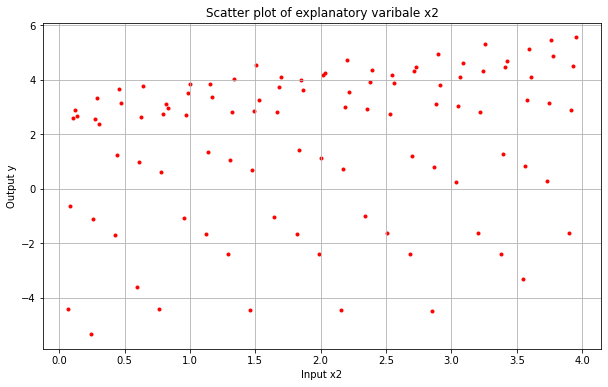

In [17]:
plt.scatter(x2, y, color='red', marker='.')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Input x2')
plt.ylabel('Output y')
plt.title('Scatter plot of explanatory varibale x2')


In [18]:
x2_0 = np.ones((m, 1))
x2_1 = x2.reshape(m, 1)
x2 = np.hstack((x2_0, x2_1))
x2[:5]

array([[1.        , 0.13494949],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798],
       [1.        , 2.91474747]])

In [19]:
theta_x2 = np.zeros(2)

In [20]:
# compute the cost for theta values
cost_x2 = compute_cost(x2, y, theta_x2)
print('Cost for given values of theta_0 and theta_1 =', cost_x2)

Cost for given values of theta_0 and theta_1 = 5.483015861682611


In [21]:
theta_x2 = [0., 0.]
iterations_x2 = 1500;
alpha_x2 = 0.01;
theta_x2, cost_history_x2 = gradient_descent(x2, y, theta_x2, alpha_x2, iterations_x2)
print('Final value of theta =', theta_x2)
print('cost_history =', cost_history_x2)

Final value of theta = [0.7392744 0.5453018]
cost_history = [5.2669085  5.07623409 4.90799786 ... 3.6201926  3.62019244 3.62019228]


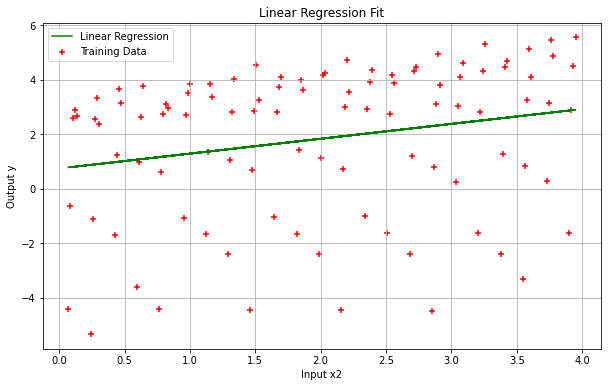

In [22]:
plt.scatter(x2[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x2[:,1], x2.dot(theta_x2), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input x2')
plt.ylabel('Output y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Convergence of gradient descent of x2')

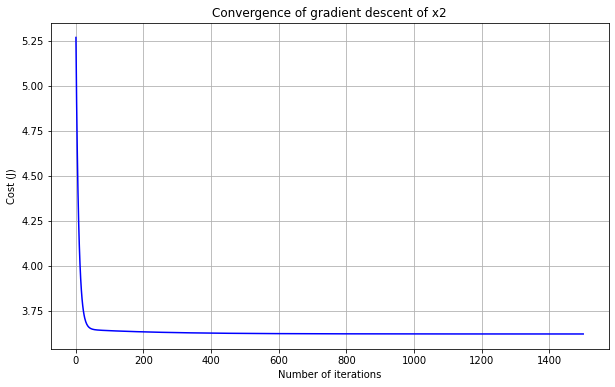

In [23]:
plt.plot(range(1, iterations_x2 + 1), cost_history_x2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent of x2')

# **For x3**

Text(0.5, 1.0, 'Scatter plot of explanatory varibale x3')

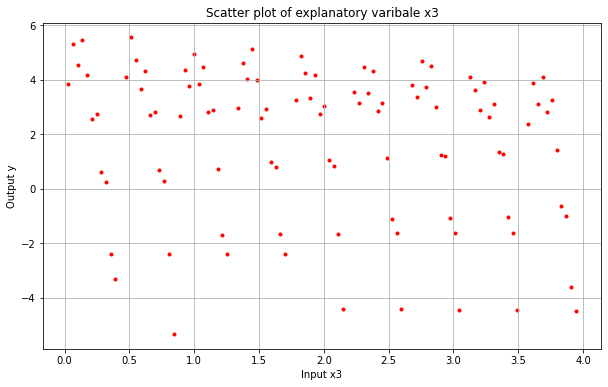

In [24]:
plt.scatter(x3, y, color='red', marker='.')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Input x3')
plt.ylabel('Output y')
plt.title('Scatter plot of explanatory varibale x3')


In [25]:
x3_0 = np.ones((m, 1))
x3_1 = x3.reshape(m, 1)
x3 = np.hstack((x3_0, x3_1))
x3[:5]

array([[1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545455],
       [1.        , 2.23393939],
       [1.        , 2.68242424]])

In [26]:
theta_x3 = np.zeros(2)

In [27]:
# compute the cost for theta values
cost_x3 = compute_cost(x3, y, theta_x3)
print('Cost for given values of theta_0 and theta_1 =', cost_x3)

Cost for given values of theta_0 and theta_1 = 5.483015861682611


In [28]:
theta_x3 = [0., 0.]
iterations_x3 = 1500;
alpha_x3 = 0.01;
theta_x3, cost_history_x3 = gradient_descent(x3, y, theta_x3, alpha_x3, iterations_x3)
print('Final value of theta =', theta_x3)
print('cost_history =', cost_history_x3)

Final value of theta = [ 2.71943299 -0.46300206]
cost_history = [5.366643   5.26340773 5.17178032 ... 3.65144217 3.65143712 3.6514321 ]


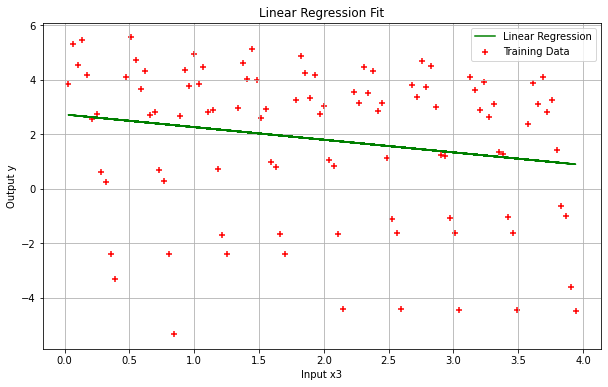

In [29]:
plt.scatter(x3[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(x3[:,1], x3.dot(theta_x3), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Input x3')
plt.ylabel('Output y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Convergence of gradient descent of x3')

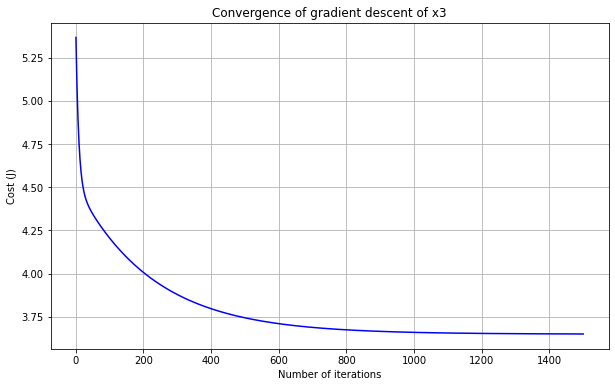

In [30]:
plt.plot(range(1, iterations_x3 + 1), cost_history_x3, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent of x3')